In [164]:
import numpy as np
import pandas as pd

def expected_payoff_1(sigma,x,A):
    """
    Takes in sigma, x and A and returns the expected payoff for player 1, given by (x^T)A(sigma)
    We use the fact that we know that the expected payoff is equal to xAy.
    
    Input:
    -sigma : 1x2 vector, which is the “statistical mixed strategy" player 1 calculates (Array)
    -x: either [1,0] or [0,1], one of player 1s pure strategy (Array)
    -A: Payoff matrix (np.matrix)
    
    Returns:
    -Expected payoff (int)
    """
    return (x@A@sigma).tolist()[0][0]
    
def expected_payoff_2(sigma,y,A):
    """
    Takes in sigma, x and A and returns the expected payoff for player 2, given by (sigma^T)A(y)
    We use the fact that we know that the expected payoff is equal to xAy.
    
    Input:
    -sigma : 1x2 vector, which is the “statistical mixed strategy" player 2 calculates (Array)
    -y: either [1,0] or [0,1], one of player 2s pure strategy (Array)
    -A: Payoff matrix (np.matrix)
    
    Returns:
    -Expected payoff (int)
    """
    return (sigma@A@y).tolist()[0][0]

def pick_strategy(player,sigma, A):
    """
    For a given player it picks thier optimal best response for the “statistical mixed strategy" they calculate.
    
    Input:
    -player: either 1 or 2 indicating which player is playing (int)
    -sigma: “statistical mixed strategy" calculated by player 1 or 2 (Array)
    -A: Payoff matrix (np.matrix)
    
    Output:
    -optimal best response for player 1 or 2 ([1,0] or [0,1])
    """
    #These are the possible pure strategies
    pure_strategies = [[1,0],[0,1]]

    if(player == 1):
        PS_1 = expected_payoff_1(sigma,pure_strategies[0],A)
        PS_2 = expected_payoff_1(sigma,pure_strategies[1],A)
        #Player 1 picks strategy which maximises the expected payoff
        if(PS_1 > PS_2):
            return pure_strategies[0]
        else:
             return pure_strategies[1]
    
    else:
        PS_1 = expected_payoff_2(sigma,pure_strategies[0],A)
        PS_2 = expected_payoff_2(sigma,pure_strategies[1],A)
        #Note that player 2 is trying to minimize the expected payoff so they 
        #pick the strategy which minimizes the payoff
        if(PS_1 > PS_2):
            return pure_strategies[1]
        else:
             return pure_strategies[0]
    
def run(rounds, A, start_1, start_2):
    """
    This function runs plays this strategy update method for both players in repeated play for a 
    given number of iterations.
    
    Input:
    -rounds: number of rounds (int)
    -A: Payoff matrix (np.matrix)
    -start_1: player 1s strating strategy ([1,0] or [0,1]) 
    -start_2: player 2s strating strategy ([1,0] or [0,1]) 
    
    Output:
    -list_sigma_1, list_sigma_2: list of all the “statistical mixed strategies” of the two players at each iteration.
    """
    
    N_1, M_1, N_2, M_2 = 0, 0, 0, 0
    
    list_sigma_1, list_sigma_2 = [], []

    player_1 = start_1 
    player_2 = start_2 
    
    if player_1 == [1,0]:
        N_1+=1
    else:
        M_1+=1
    
    if player_2 == [1,0]:
        N_2+=1
    else:
        M_2+=1
        
    sigma_1 = [N_1/(N_1+M_1),M_1/(N_1+M_1)]
    sigma_2 = [N_2/(N_2+M_2),M_2/(N_2+M_2)]
    
    for i in range(rounds):
        
        list_sigma_1.append(sigma_1)
        list_sigma_2.append(sigma_2)
            
        player_1 = pick_strategy(1,sigma_2, A)
        player_2 = pick_strategy(2,sigma_1, A)
        
        if player_1 == [1,0]:
            N_1+=1
        else:
            M_1+=1

        if player_2 == [1,0]:
            N_2+=1
        else:
            M_2+=1
        
        sigma_1 = [N_1/(N_1+M_1),M_1/(N_1+M_1)]
        sigma_2 = [N_2/(N_2+M_2),M_2/(N_2+M_2)]
        
    return(list_sigma_1, list_sigma_2)

In [165]:
rounds = 30000
A = np.matrix('3 1; 0 2')

NE_1 = [0.5,0.5]
NE_2 = [0.25,0.75]

list_sigma_1,list_sigma_2 = run(rounds, A, [1,0], [1,0])

norm_sigma_1 = [np.linalg.norm(np.array(i)-np.array(NE_1)) for i in list_sigma_1]
norm_sigma_2 = [np.linalg.norm(np.array(i)-np.array(NE_2)) for i in list_sigma_2]

In [184]:
def table(rounds, A, start_1, start_2):
    sigma_1_list = []
    sigma_2_list = []
    
    for x in rounds:    
        a, b = run(x, A, start_1, start_2)
        sigma_1_list.append(a[-1])
        sigma_2_list.append(b[-1])

    d = {'Rounds':rounds,'$\sigma_1$': sigma_1_list, '$\sigma_2$': sigma_2_list}
    df = pd.DataFrame(data=d)
    df.reset_index(drop=True, inplace=True)
    return df

rounds = [10,50,100,250,500,1000,2500,5000,10000,25000,50000]
A = np.matrix('3 1; 0 2')

df_1 = table(rounds, A, [1,0], [1,0])
df_2 = table(rounds, A, [1,0], [0,1])
df_3 = table(rounds, A, [0,1], [1,0])
df_4 = table(rounds, A, [0,1], [0,1])

In [223]:
def plot_graph(rounds, A, start_1, start_2):
    import matplotlib.pyplot as plt
    
    rounds = rounds

    NE_1 = [0.5,0.5]
    NE_2 = [0.25,0.75]

    list_sigma_1, list_sigma_2 = run(steps, A, start_1, start_2)

    norm_sigma_1 = [np.linalg.norm(np.array(i)-np.array(NE_1)) for i in list_sigma_1]
    norm_sigma_2 = [np.linalg.norm(np.array(i)-np.array(NE_2)) for i in list_sigma_2]

    list_rounds = [i for i in range(rounds)]

    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15, 8))

    fig.suptitle('Plotting 2-norm against Round. Strating at pure strategies Player 1 = {} and Player 2 = {}'.format(start_1, start_2))

    ax1.plot(list_step, norm_sigma_1)
    ax2.plot(list_step, norm_sigma_2, color="orange")

    ax1.set(title = "$||\sigma_1 - x_1||_2$ against Round")
    ax2.set(title = "$||\sigma_2 - x_2||_2$ against Round")

    ax1.set(xlabel='Round', ylabel='$||\sigma_1 - x_1||_2$')
    ax2.set(xlabel='Round', ylabel='$||\sigma_2 - x_2||_2$')

    ax1.grid()
    ax2.grid()
    fig.tight_layout()

    fig.savefig("graph_for_{}_{}.png".format(start_1, start_2))
    plt.show()

A = np.matrix('3 1; 0 2')

plot_graph(30000, A, [1,0], [1,0])
plot_graph(30000, A, [1,0], [0,1])
plot_graph(30000, A, [0,1], [1,0])
plot_graph(30000, A, [0,1], [0,1])

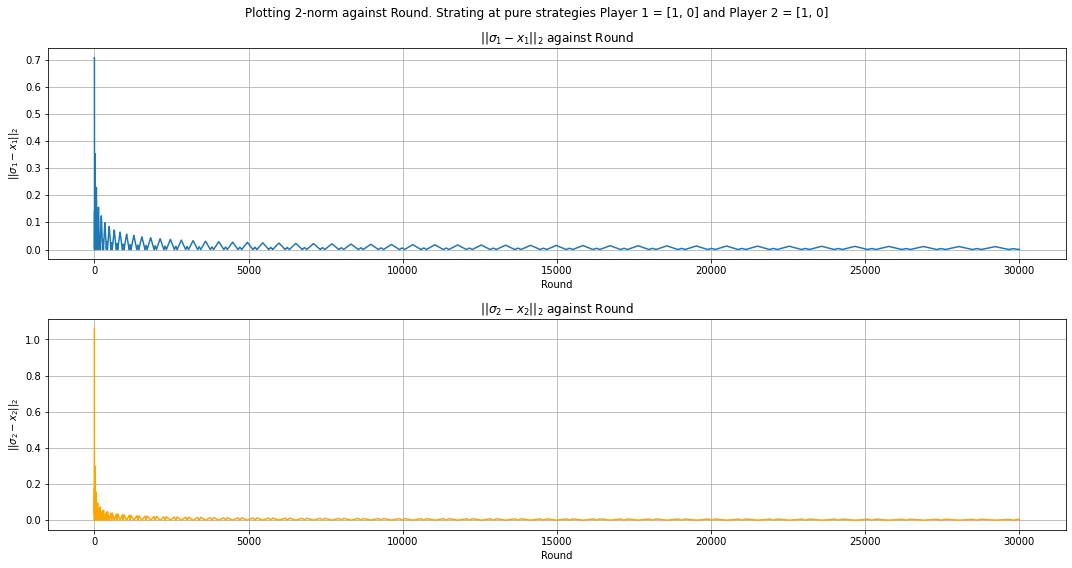

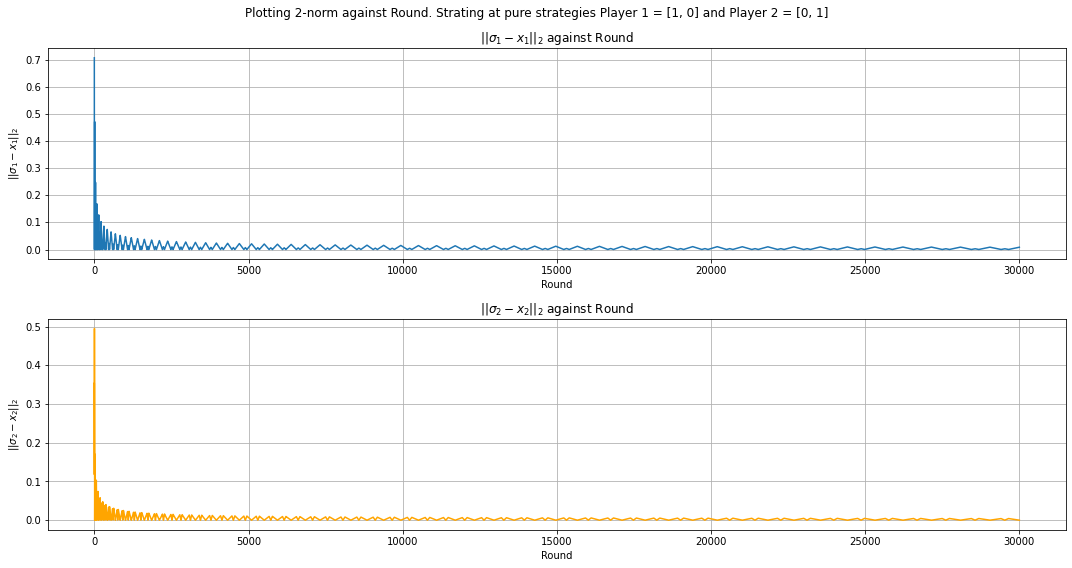

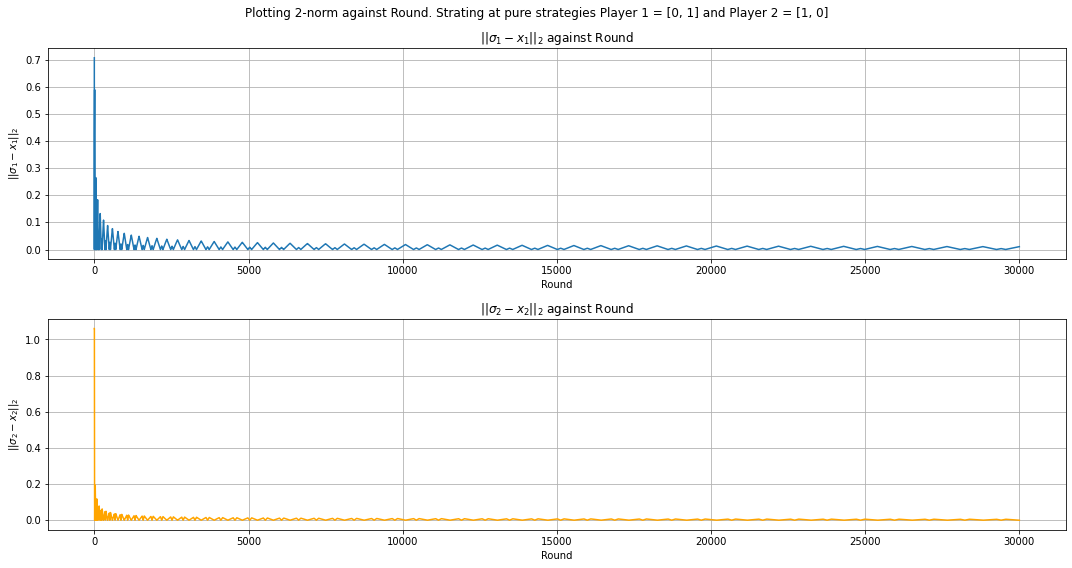

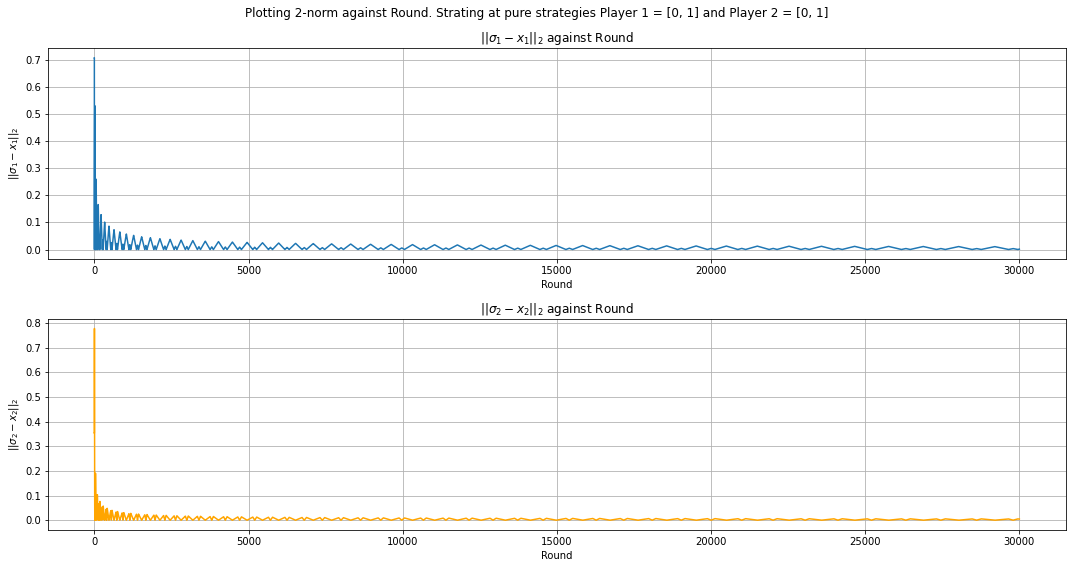